In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

Accuracy: 0.9440559440559441
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      0.83      0.91        48
           2       0.85      1.00      0.92        47

    accuracy                           0.94       143
   macro avg       0.95      0.94      0.94       143
weighted avg       0.95      0.94      0.94       143

Confusion Matrix:
[[48  0  0]
 [ 0 40  8]
 [ 0  0 47]]


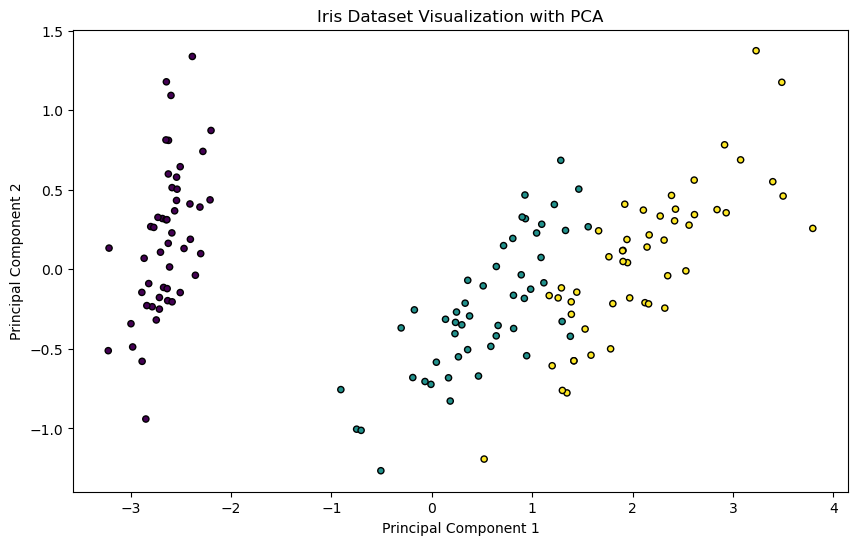

In [26]:
# Importation des bibliothèques nécessaires
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import joblib  # Importation de la bibliothèque pickle pour la sauvegarde du modèle

# Chargement du jeu de données Iris
iris = load_iris()
X = iris.data  # Utilisation de toutes les caractéristiques pour l'entraînement
y = iris.target

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=42)

# Création et entraînement du modèle SVM avec toutes les caractéristiques
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test et évaluation du modèle
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Affichage des performances du modèle
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

# Pour la visualisation, réduction des dimensions à 2D avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisation des données réduites avec PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset Visualization with PCA')
plt.show()

# Sauvegarde du modèle entraîné avec pickle
with open('svm_model.pkl', 'wb') as file:
    joblib.dump(model, file)


In [25]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Sauvegarde Modele

API FLASK

In [24]:
from flask import Flask, request, jsonify
import numpy as np
import pickle

# Assurez-vous de sauvegarder votre modèle SVM après l'entraînement (étape non montrée ici)
# avec quelque chose comme: pickle.dump(model, open('svm_model.pkl', 'wb'))

app = Flask(__name__)

# Charger le modèle SVM
model = pickle.load(open('svm_model.pkl', 'rb'))

@app.route('/predict', methods=['GET'])
def predict():
    # Exemple d'arguments: ?sepal_length=5.1&sepal_width=3.5&petal_length=1.4&petal_width=0.2
    sepal_length = request.args.get('sepal_length', type=float)
    sepal_width = request.args.get('sepal_width', type=float)
    petal_length = request.args.get('petal_length', type=float)
    petal_width = request.args.get('petal_width', type=float)

    features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = model.predict(features)
    
    # Vous pouvez adapter le format de réponse selon les besoins de votre groupe
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(host="0.0.0.0", port=5000, debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
